# Student Performance Indicator

#### Life cycle of Machine Learning Project

- Understanding the Problem Statement
- Data Collection
- Data checks to perform
- Exploratory Data Analysis
- Data Pre-Processing
- Model Training
- Choosing the Best Model

### 1) Problem Statement

- This project understands how the performance of students in exam (test scores) is affected by other variables such as Gender, race/ethinicity, Parental level of education, Type of lunch programme, Test preparation course and Scores in Math, reading and writting.

### 2) Data Collection

- Data Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The Dataset consists of 8 features and 1000 data points.

### 2.1 Import required packages and Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/StudentsPerformance.csv')

### Show top 5 data

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Shape of the Dataset

In [4]:
df.shape

(1000, 8)

### 2.2 Dataset Information

- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3) Data checks to perform

- Check Missing Values
- Check Duplicates
- Check Datatypes
- Check number of unique values present in each column
- Check Statistics of the data
- Check number of categorical and numeric features present in the dataset
- Check various categories present in the different categorical variables

### 3.1 Checking Missing Values

In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### Observation: There are no missing values in the dataset.

### 3.2 Checking Duplicates

In [6]:
df.duplicated().sum()

0

#### Observation: There are no duplicates in the dataset.

### 3.3 Check DataTypes

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Checking the number of unique values of each columns

In [8]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

### 3.5 Checking Statistics of the data

In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
df.describe(include='object')

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


#### Insights:

- All numerical variables mean and standard deviation are closer.
- While there is a minimum score  0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17
- The number of females are slightly higher than male.
- Most of the students (642) doesn't complete the test preparation course.
- 645 students are in the regular lunch plan.
- Most of the students parents were studies in some college.

### 3.6 Exploring Data

In [11]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print(f'The {len(numerical_features)} Numerical Features are ----- {numerical_features}\n')
print(f'The {len(categorical_features)} Categorical Features are ----- {categorical_features}')

The 3 Numerical Features are ----- ['math score', 'reading score', 'writing score']

The 5 Categorical Features are ----- ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [13]:
for feature in categorical_features:
    print(f'\nCategories in {feature} variable:     ', end=" ")
    print(df[feature].unique())


Categories in gender variable:      ['female' 'male']

Categories in race/ethnicity variable:      ['group B' 'group C' 'group A' 'group D' 'group E']

Categories in parental level of education variable:      ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Categories in lunch variable:      ['standard' 'free/reduced']

Categories in test preparation course variable:      ['none' 'completed']


### 3.7  Adding 'Total Score' and 'Average' Features

In [14]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score'] / 3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [15]:
## Number of full marks scorers in each subject

math_full = df[df['math score']==100]['average'].count()
reading_full = df[df['reading score']==100]['average'].count()
writing_full = df[df['writing score']==100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [16]:
## Number of students scored less than 40 in each subject

math_fail = df[df['math score'] < 40]['average'].count()
reading_fail = df[df['reading score'] < 40]['average'].count()
writing_fail = df[df['writing score']< 40]['average'].count()

print(f'Number of students with less than 40 marks in Maths: {math_fail}')
print(f'Number of students with less than 40 marks in Writing: {writing_fail}')
print(f'Number of students with less than 40 marks in Reading: {reading_fail}')

Number of students with less than 40 marks in Maths: 40
Number of students with less than 40 marks in Writing: 32
Number of students with less than 40 marks in Reading: 26


### Observation

- Students performed worst in Maths
- Best performance is in Reading

### 4) Exploratory Data Analysis (Visualization)

### 4.1 First we will see the distribution of all features

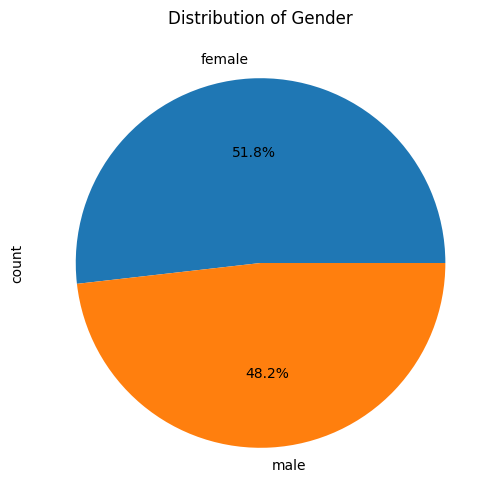

In [29]:
plt.figure(figsize=(8,6))
df['gender'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Gender')
plt.show()

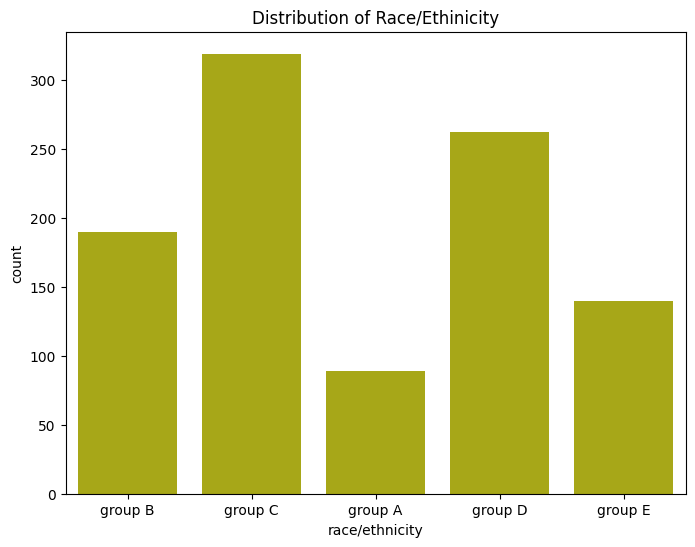

In [34]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='race/ethnicity', color='y')
plt.title('Distribution of Race/Ethinicity')
plt.show()

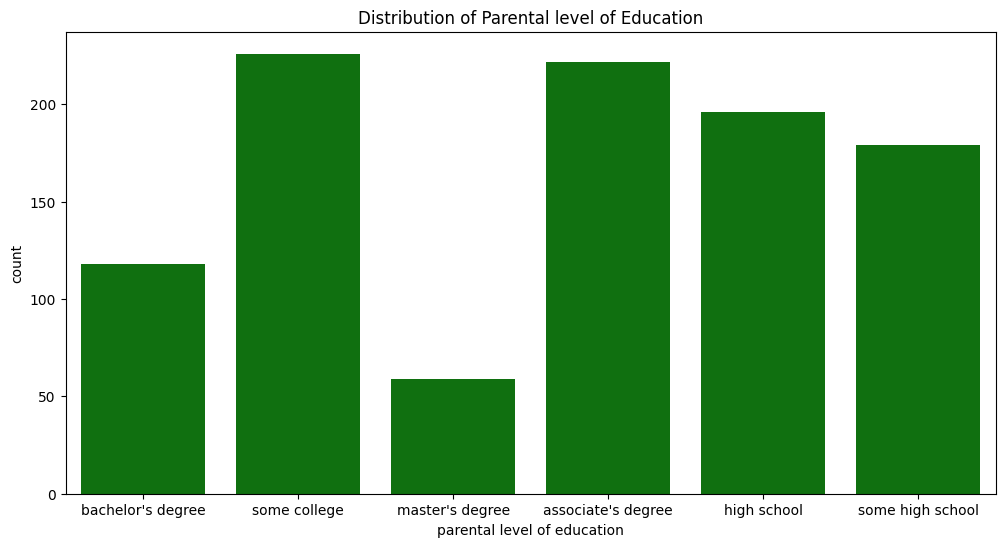

In [45]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='parental level of education', color='g')
plt.title('Distribution of Parental level of Education')
plt.show()

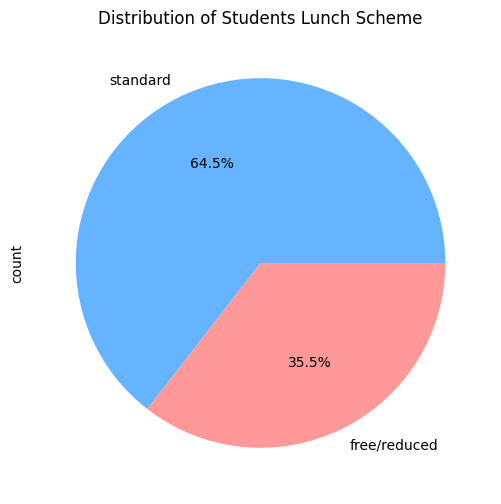

In [44]:
plt.figure(figsize=(8,6))
colors = ['#66b3ff', '#ff9999']
df['lunch'].value_counts().plot.pie(autopct='%1.1f%%', colors=colors)
plt.title('Distribution of Students Lunch Scheme')
plt.show()

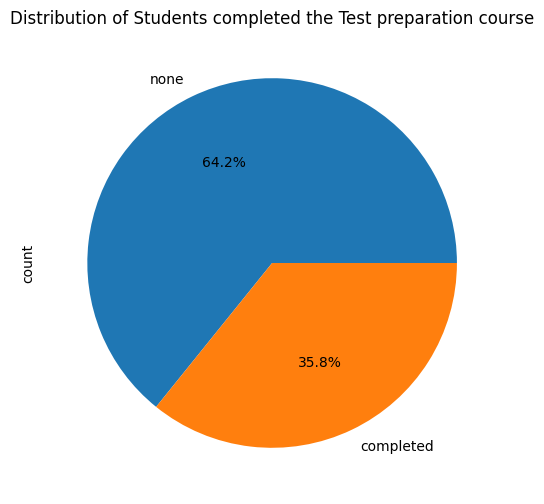

In [41]:
plt.figure(figsize=(10,6))
df['test preparation course'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Students completed the Test preparation course')
plt.show()

### Observation

- Male and Female are almost similar in distribution.
- Race/ethinicity of Group C and D are quite higher while Group A, B and E are lower.
- Parental education of Master's degree are very low followed by Bachelor's degree while others are similar in distribution.
- Around 65% of students prefer standard lunch scheme.
- 65% of students did not complete the test preparation course before taking the exam.

### 4.2 We will try to plot histograms and kde plots to compare how the scores are within the students and especially within male and female students and we will also try to compare it with various features to see how it affects the score.

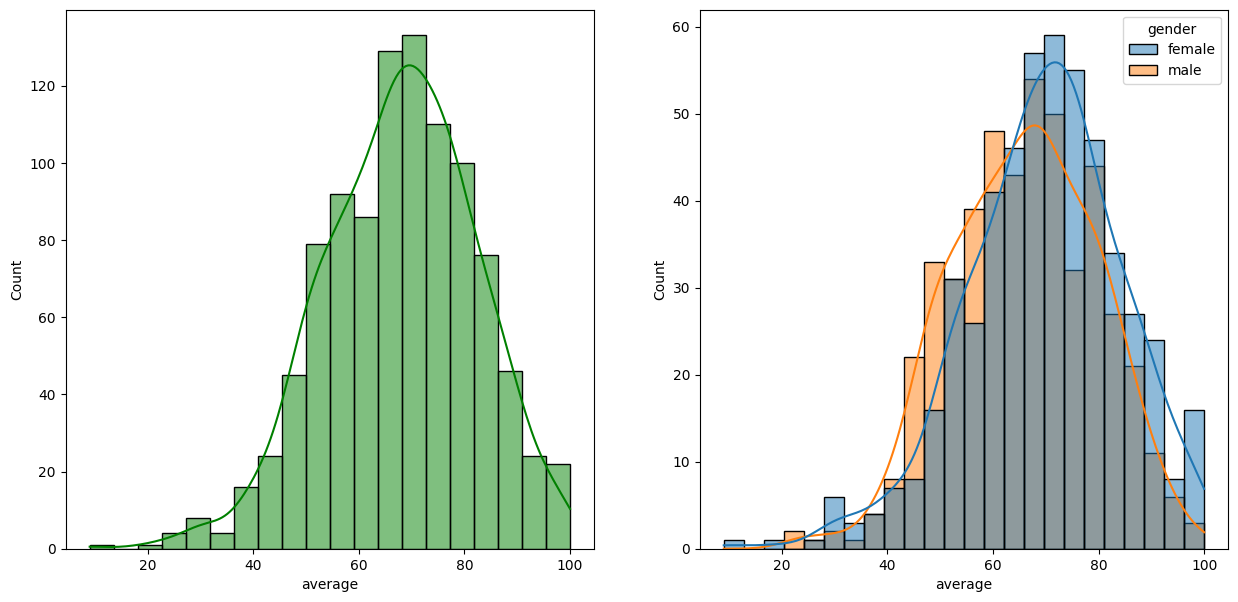

In [17]:
plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=20, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average', kde=True, hue='gender')
plt.show()

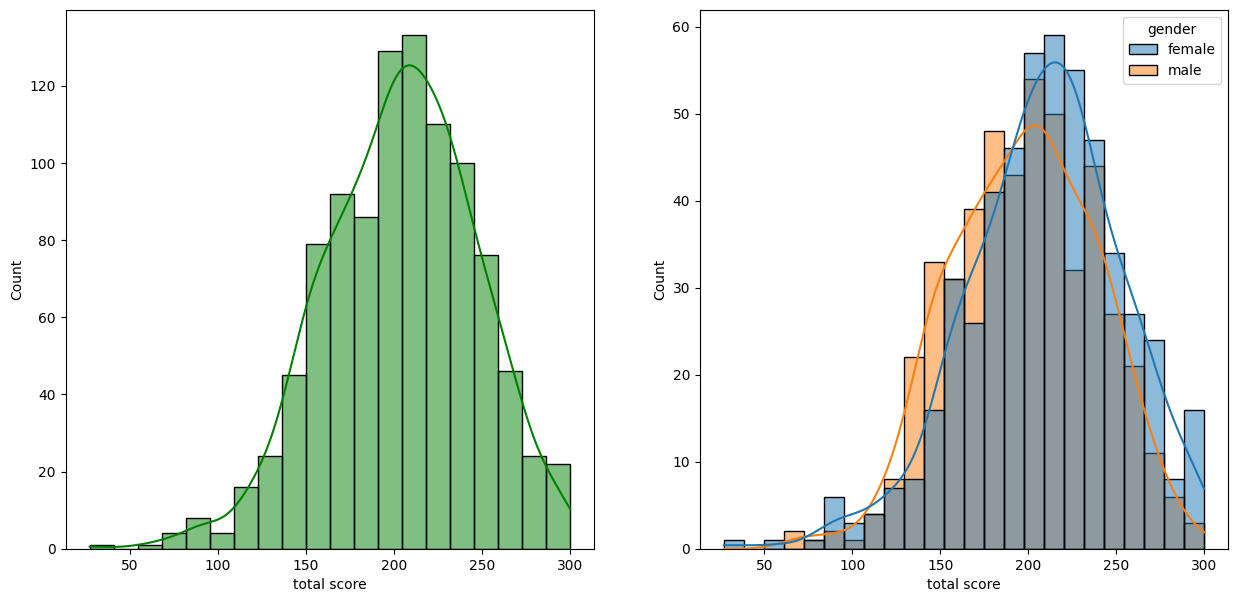

In [18]:
plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='total score', bins=20, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='total score', kde=True, hue='gender')
plt.show()

### Insights

- Female students perform well than male students in the overall score

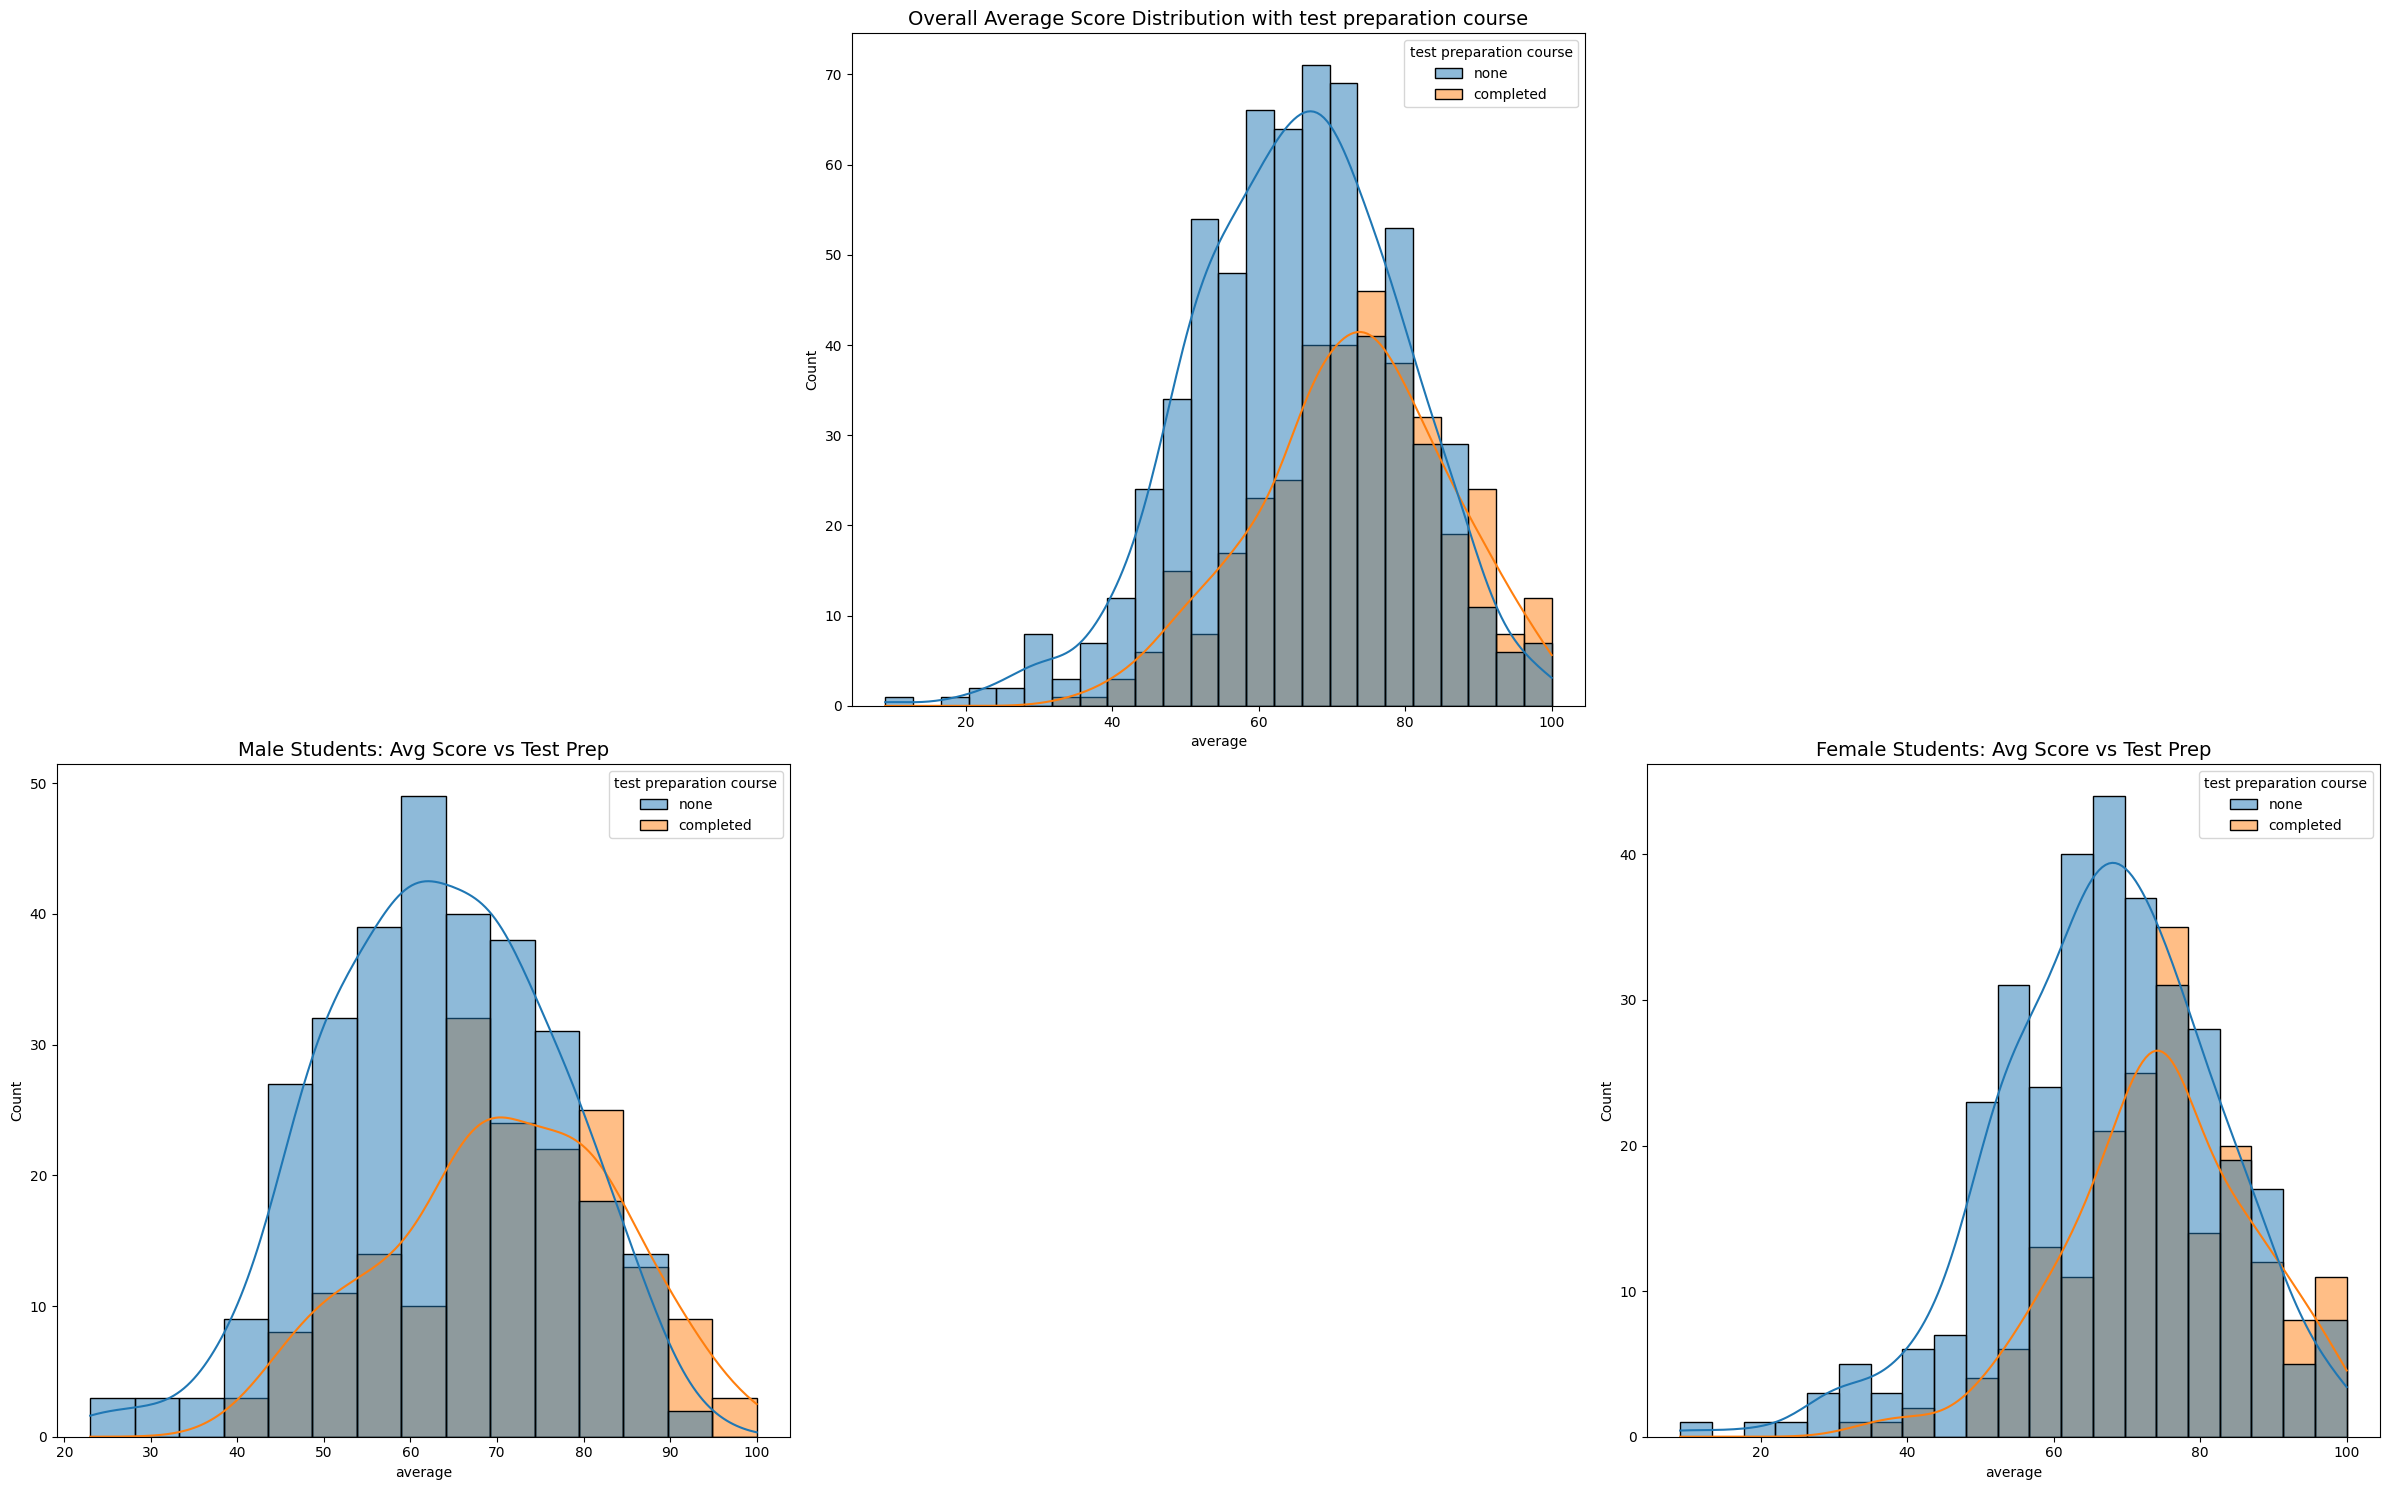

In [19]:
fig, axs = plt.subplots(2, 3, figsize=(24, 15))

plt.subplot(232)
sns.histplot(data=df, x='average', kde=True, hue='test preparation course', ax = axs[0][1])
axs[0][1].set_title('Overall Average Score Distribution with test preparation course', fontsize=14)

plt.subplot(234)
sns.histplot(data=df[df['gender']=='male'], x='average', kde=True, hue= 'test preparation course', ax = axs[1][0])
axs[1][0].set_title('Male Students: Avg Score vs Test Prep', fontsize=14)

plt.subplot(236)
sns.histplot(data=df[df['gender']=='female'], x='average', kde=True, hue= 'test preparation course', ax = axs[1][2])
axs[1][2].set_title('Female Students: Avg Score vs Test Prep', fontsize=14)


axs[0][0].axis('off')
axs[0][2].axis('off')
axs[1][1].axis('off')

plt.tight_layout()
plt.show()

### Insights

- We can see from the figure that if a student had completed the test preparation course their chance of getting less than 40 decreases and getting 80 to 100 increases.
- More generally, test preparation course has helped most of the students to score well in the exam.

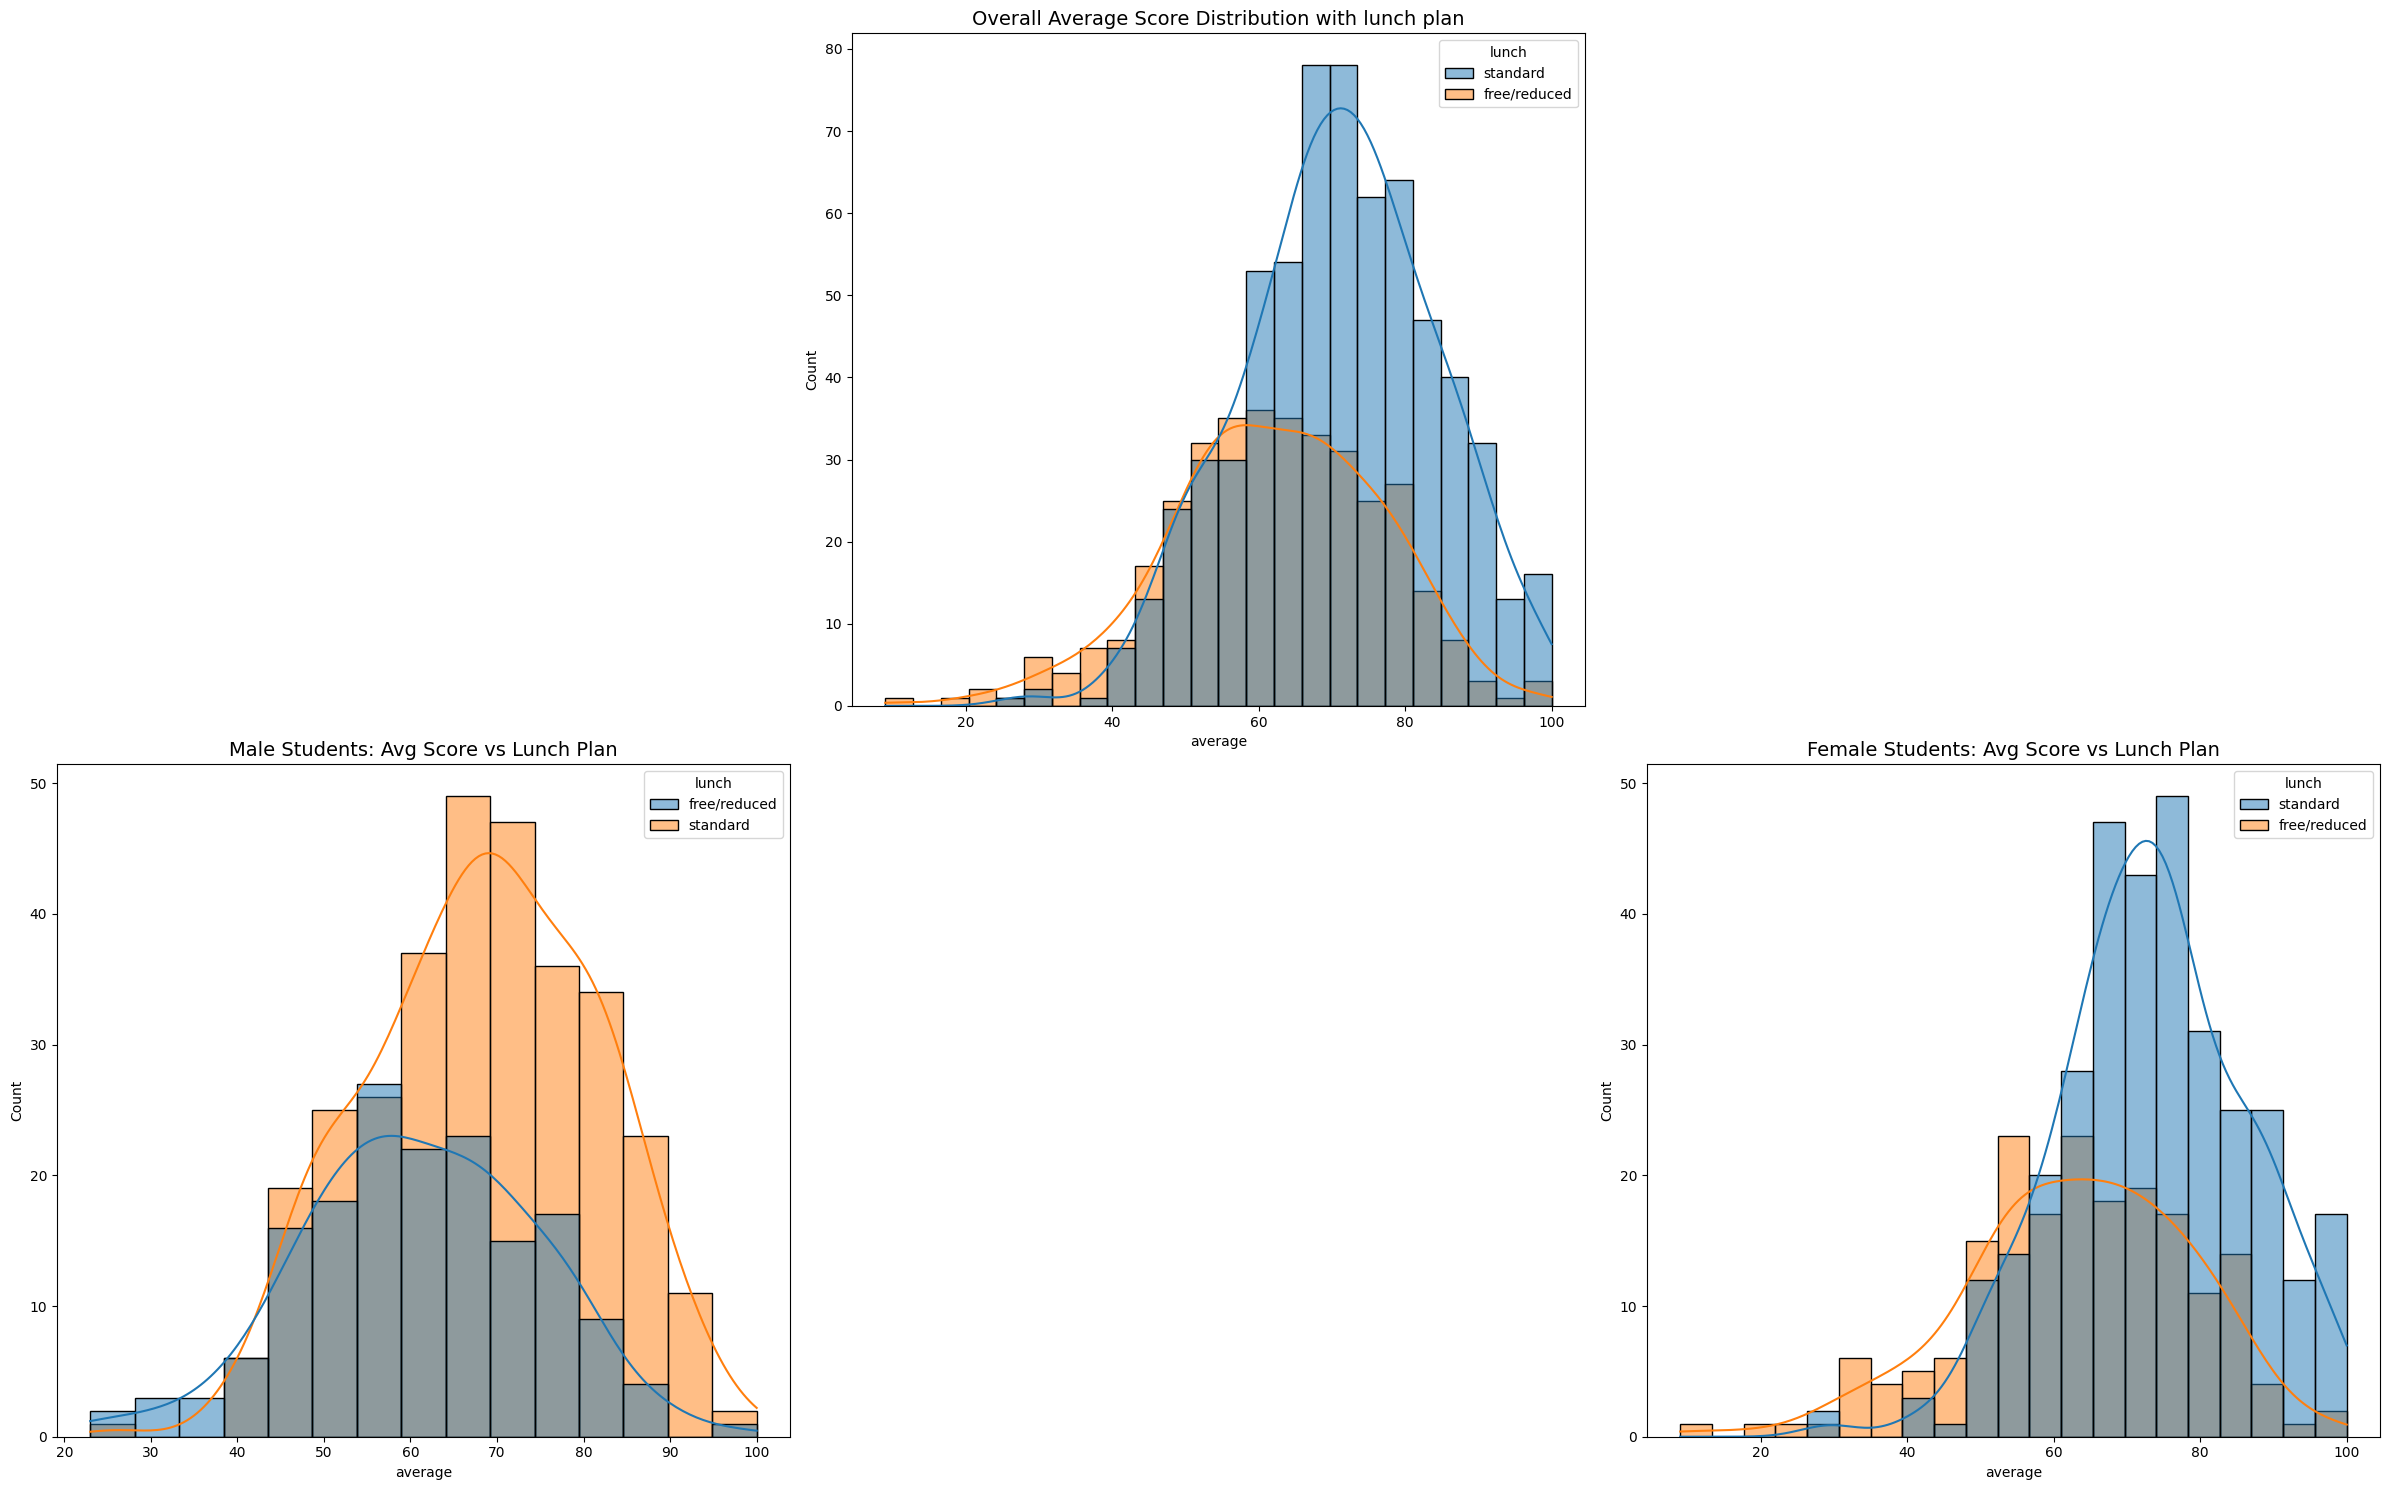

In [20]:
fig, axs = plt.subplots(2, 3, figsize=(24, 15))

plt.subplot(232)
sns.histplot(data=df, x='average', kde=True, hue='lunch', ax = axs[0][1])
axs[0][1].set_title('Overall Average Score Distribution with lunch plan', fontsize=14)

plt.subplot(234)
sns.histplot(data=df[df['gender']=='male'], x='average', kde=True, hue= 'lunch', ax = axs[1][0])
axs[1][0].set_title('Male Students: Avg Score vs Lunch Plan', fontsize=14)

plt.subplot(236)
sns.histplot(data=df[df['gender']=='female'], x='average', kde=True, hue= 'lunch', ax = axs[1][2])
axs[1][2].set_title('Female Students: Avg Score vs Lunch Plan', fontsize=14)


axs[0][0].axis('off')
axs[0][2].axis('off')
axs[1][1].axis('off')

plt.tight_layout()
plt.show()

### Insights

- The students having standard lunch plan tends to perform much better than the students in free/reduced meal plan.
- This observation holds true for both make and female students.

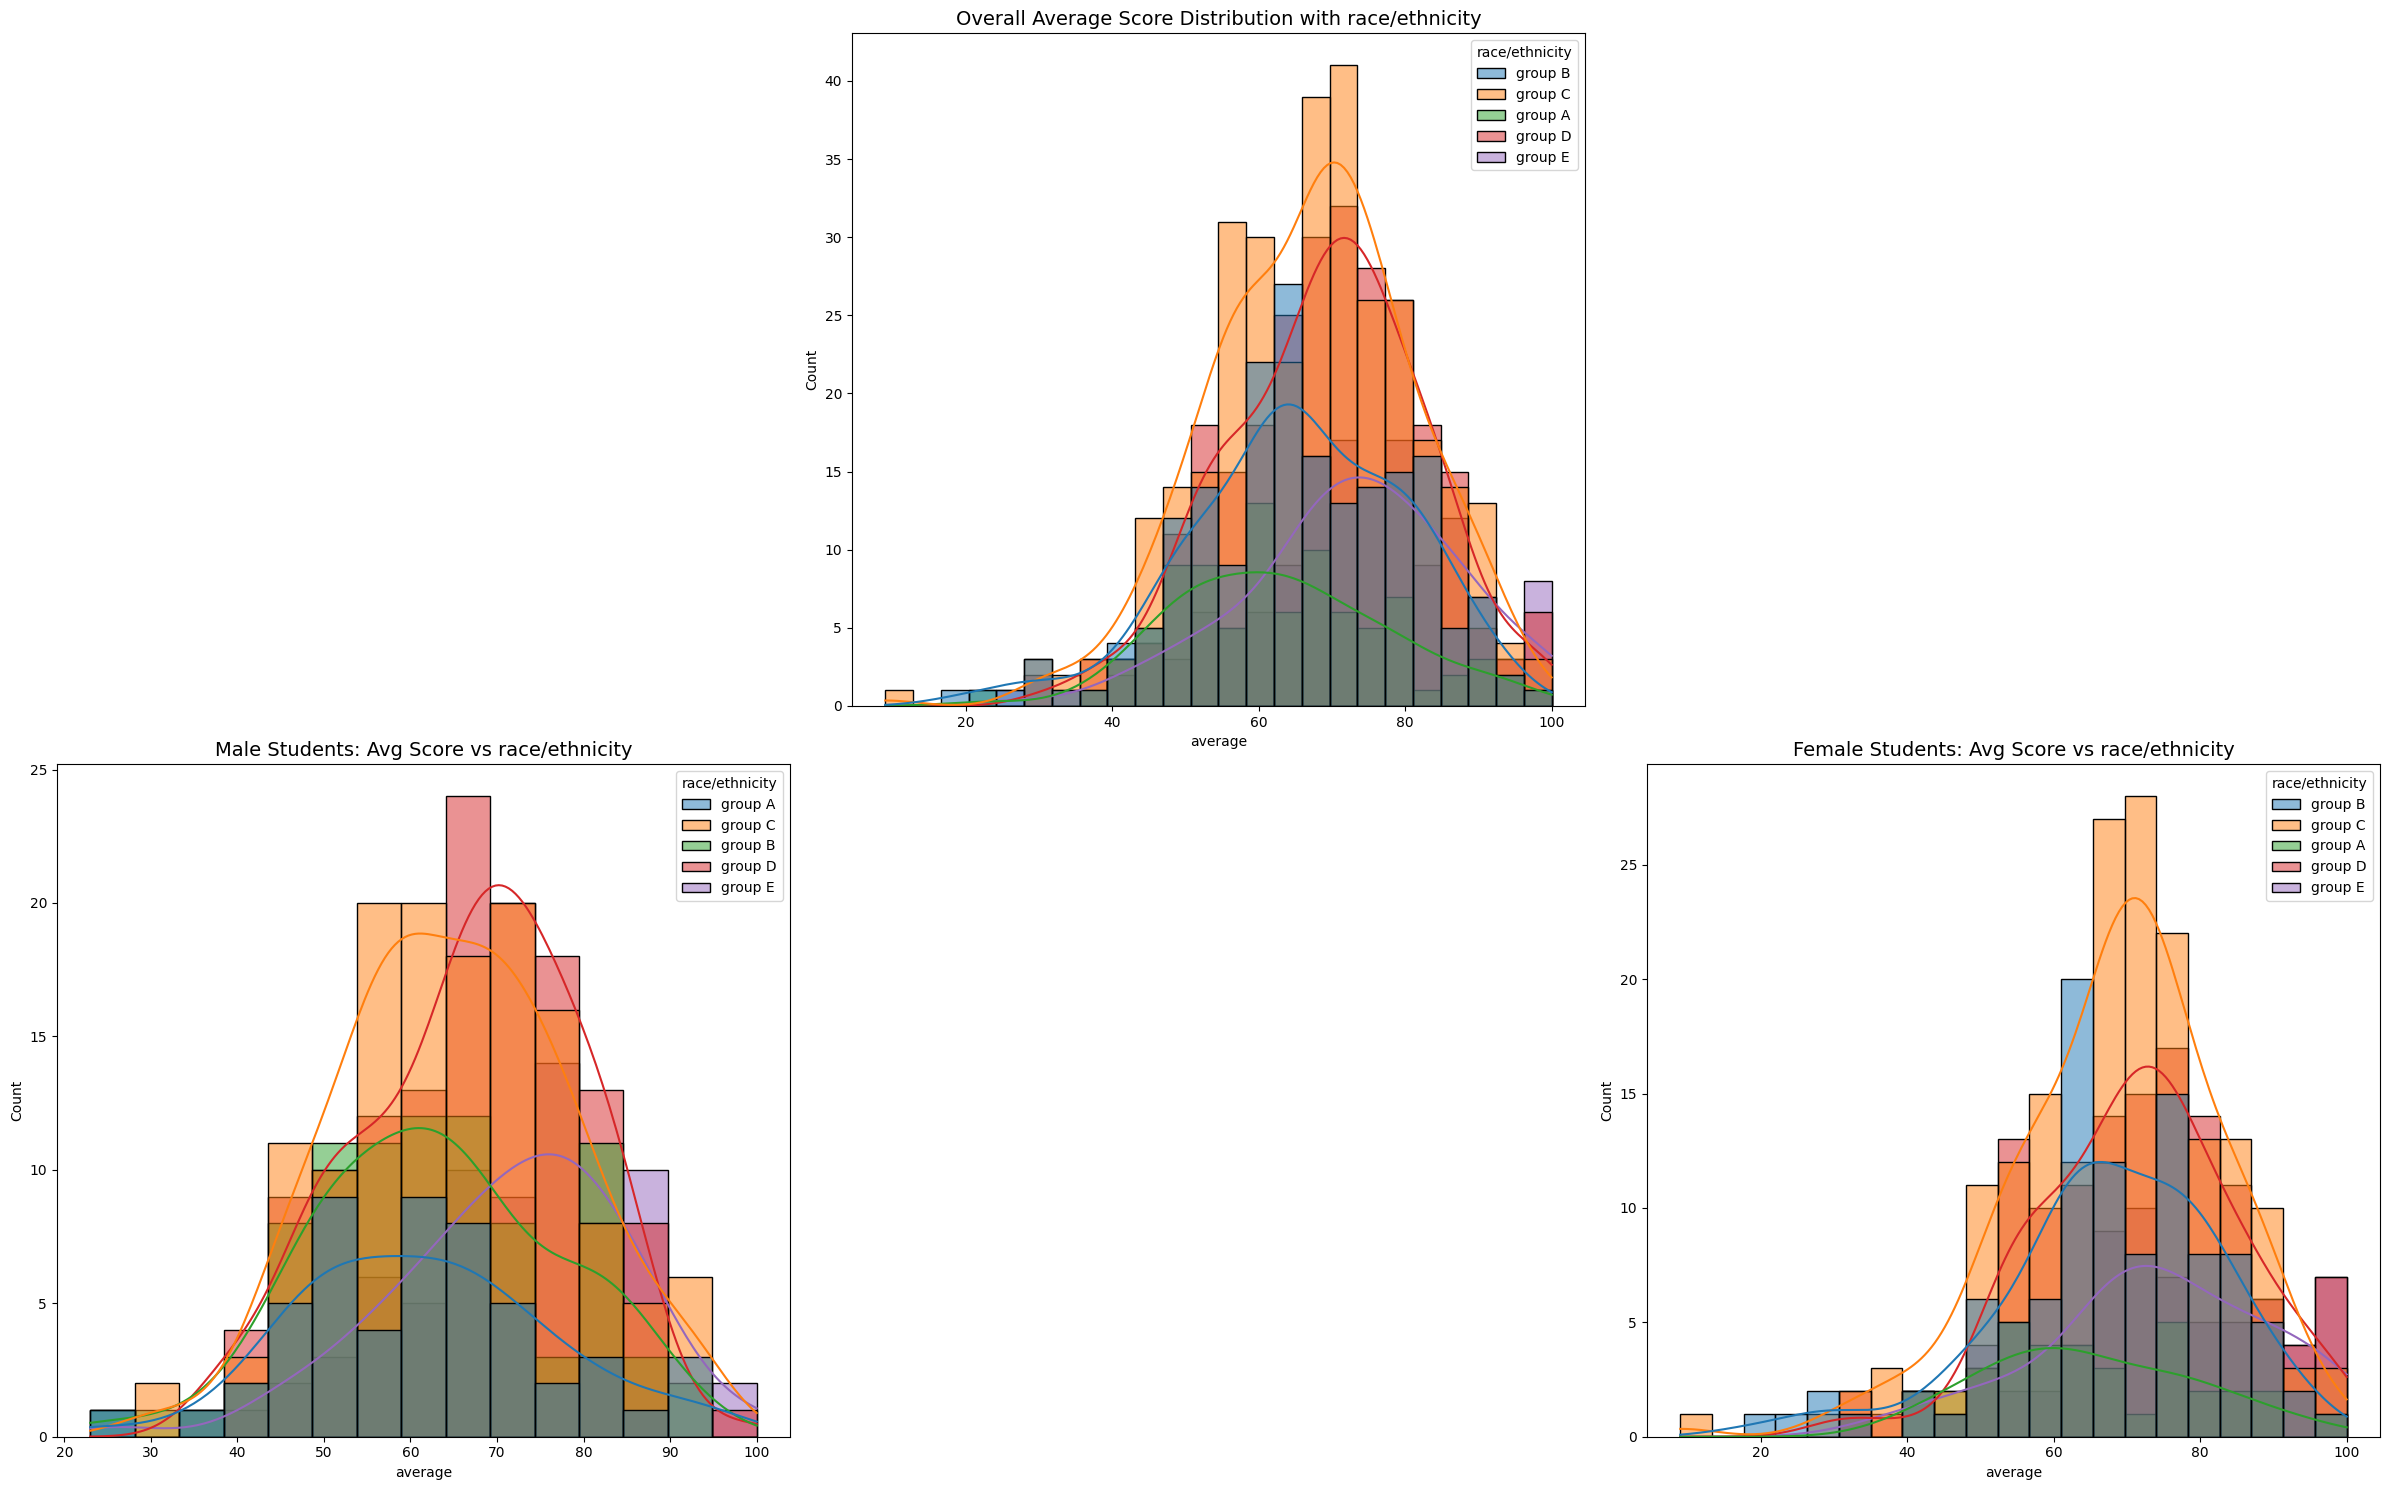

In [21]:
fig, axs = plt.subplots(2, 3, figsize=(24, 15))

plt.subplot(232)
sns.histplot(data=df, x='average', kde=True, hue='race/ethnicity', ax = axs[0][1])
axs[0][1].set_title('Overall Average Score Distribution with race/ethnicity', fontsize=14)

plt.subplot(234)
sns.histplot(data=df[df['gender']=='male'], x='average', kde=True, hue= 'race/ethnicity', ax = axs[1][0])
axs[1][0].set_title('Male Students: Avg Score vs race/ethnicity', fontsize=14)

plt.subplot(236)
sns.histplot(data=df[df['gender']=='female'], x='average', kde=True, hue= 'race/ethnicity', ax = axs[1][2])
axs[1][2].set_title('Female Students: Avg Score vs race/ethnicity', fontsize=14)


axs[0][0].axis('off')
axs[0][2].axis('off')
axs[1][1].axis('off')

plt.tight_layout()
plt.show()

### Insights

- Students of Group A and B tends to perform poorly irrespective of their gender
- Students in Group C and D performs well in average when compared to other groups.

### 4.3 Exam Scores Analysis

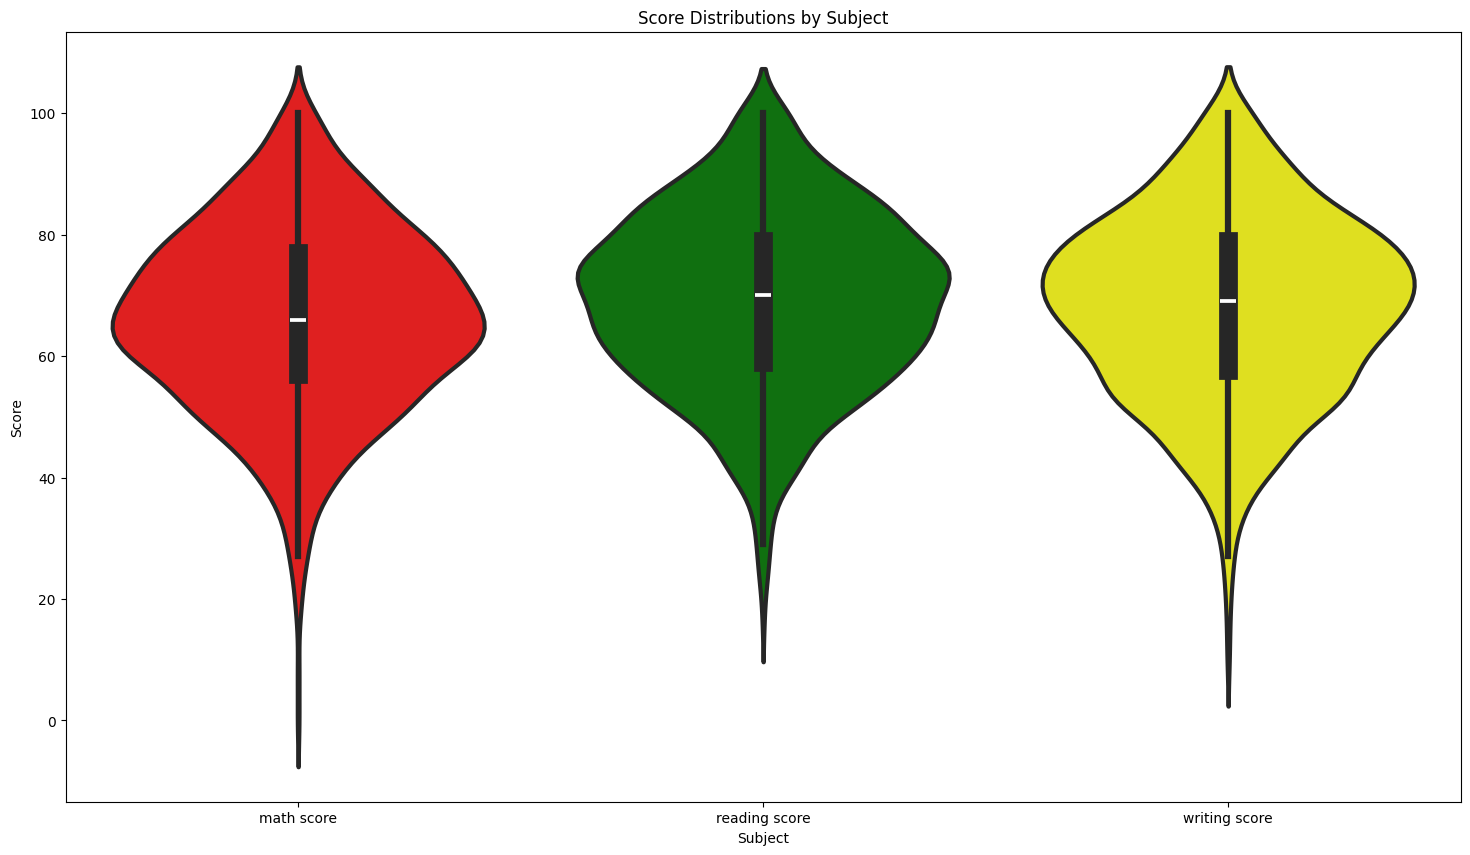

In [55]:
df_melted = pd.melt(df, 
                    value_vars=['math score', 'reading score', 'writing score'],
                    var_name='Subject', 
                    value_name='Score')

plt.figure(figsize=(18, 10))
sns.violinplot(data=df_melted, x='Subject', y='Score',
               palette={'math score': 'red', 'reading score': 'green', 'writing score': 'yellow'},
               linewidth=3)

plt.title('Score Distributions by Subject')
plt.show()

### Insights:

- Most of the students scored around 65 in Maths.
- Most of the students scored around 70 to 75 in Reading and Writing.
- Number of students scored above 80 is higher in reading and writing.
- Some students have scored less than 20 and even 0 in Maths.